In [1]:
import pandas as pd
import numpy as np
import functools as ft
import itertools as it
import multiprocessing as mp
import scipy.sparse as sp
from go_learning_helpers import *
import itertools
import matplotlib.pyplot as plt
from gensim import corpora
from collections import defaultdict
from gensim.models import TfidfModel
from collections import Counter
import json

%matplotlib notebook

In [2]:
spinglass_clusters = pd.read_csv('../results/consensus_spinglass.txt', sep ='\t')
spinglass_clusters.head(5)

,names,cluster
0,PAK1,1
1,ERBB2,2
2,RON,3
3,YES,3
4,TYRO3,3


In [3]:
edges_df = pd.read_csv('../data/Full_Kinome_Network_Compiled_weighted_pathways.txt', sep='\t', header=None)
edges_df.head()

,0,1,2
0,PAK1,ERBB2,3.0
1,RON,YES,0.5
2,TYRO3,YES,0.5
3,LYN,KIT,0.5
4,KPCA,KIT,6.0


In [ ]:
nodes = {}
edges = {}

node_ids = {n:i for i,n in enumerate(spinglass_clusters['names'].unique())}
edge_ids = {e:i for i,e in enumerate(edges_df.index.tolist())}

In [5]:
total_edges = pd.concat([edges_df[0], edges_df[1]])
total_edges.shape

(7040,)

In [6]:
cluster_counts = {i:int(np.sum(spinglass_clusters['cluster']==i)) for i in spinglass_clusters['cluster'].unique()}

In [7]:
total_items = int(np.sum(list(cluster_counts.values())))
total_items

473

In [8]:
sorted_sizes = sorted(list(cluster_counts.values()), reverse=True)
print(sorted_sizes)
sorted_clusters = list(zip(*sorted(list(cluster_counts.items()), key=lambda x: x[1], reverse=True)))[0]
print(sorted_clusters)

[126, 61, 58, 48, 22, 21, 17, 14, 9, 7, 7, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(7, 3, 6, 12, 18, 28, 2, 8, 44, 13, 29, 24, 42, 5, 10, 31, 0, 1, 19, 26, 33, 37, 4, 11, 20, 23, 32, 41, 9, 14, 15, 16, 17, 21, 22, 25, 27, 30, 34, 35, 36, 38, 39, 40, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57)


In [9]:
np.cos(np.pi*2/3)

-0.4999999999999998

In [10]:
np.power(-1, 2)

1

In [11]:
np.sum(np.array(sorted_sizes) <= 1)

30

In [176]:
x_center_locs = {}
y_center_locs = {}

# establish outer ring distances
ring_1_dist = 850
ring_2_dist = 1300
ring_3_dist = 1700

for i in range(len(sorted_clusters)):
    if(i <= 2):
        x_center_locs.update({sorted_clusters[i]:0})
    elif(i == 3 or i == 6):
        x_center_locs.update({sorted_clusters[i]:int(np.cos(np.pi*7/6)*ring_1_dist)})
    elif(i == 4 or i == 5):
        x_center_locs.update({sorted_clusters[i]:int(np.cos(np.pi/6)*ring_1_dist)})
    elif(i <= 26):
        x_center_locs.update({sorted_clusters[i]:int(np.cos(np.pi/2 + 2*np.pi*(i%20)*np.power(-1,i)/20.0)*ring_2_dist)})
    else:
        x_center_locs.update({sorted_clusters[i]:int(np.cos(np.pi/2 + 2*np.pi*(i%31)/31.0)*ring_3_dist)})

for i in range(len(sorted_clusters)):
    if(i <= 0):
        y_center_locs.update({sorted_clusters[i]:0})
    elif(i == 1):
        y_center_locs.update({sorted_clusters[i]:ring_1_dist})
    elif(i == 2):
        y_center_locs.update({sorted_clusters[i]:-ring_1_dist})
    elif(i == 3 or i == 5):
        y_center_locs.update({sorted_clusters[i]:int(np.sin(np.pi*7/6)*ring_1_dist)})
    elif(i == 4 or i == 6):
        y_center_locs.update({sorted_clusters[i]:int(np.sin(np.pi/6)*ring_1_dist)})
    elif(i <= 26):
        y_center_locs.update({sorted_clusters[i]:int(np.sin(np.pi/2 + 2*np.pi*(i%20)*np.power(-1,i)/20.0)*ring_2_dist)})
    else:
        y_center_locs.update({sorted_clusters[i]:int(np.sin(np.pi/2 + 2*np.pi*(i%31)/31.0)*ring_3_dist)})


In [177]:
x_center_locs

{7: 0,
 3: 0,
 6: 0,
 12: -736,
 18: 736,
 28: 736,
 2: -736,
 8: 1051,
 44: -764,
 13: 401,
 29: 0,
 24: -401,
 42: 764,
 5: -1051,
 10: 1236,
 31: -1300,
 0: 1236,
 1: -1051,
 19: 764,
 26: -401,
 33: 0,
 37: 401,
 4: -764,
 11: 1051,
 20: -1236,
 23: 1300,
 32: -1236,
 41: 1232,
 9: 971,
 14: 670,
 15: 342,
 16: 0,
 17: -342,
 21: -670,
 22: -971,
 25: -1232,
 27: -1442,
 30: -1594,
 34: -1680,
 35: -1697,
 36: -1645,
 38: -1526,
 39: -1344,
 40: -1107,
 43: -825,
 45: -508,
 46: -171,
 47: 171,
 48: 508,
 49: 825,
 50: 1107,
 51: 1344,
 52: 1526,
 53: 1645,
 54: 1697,
 55: 1680,
 56: 1594,
 57: 1442}

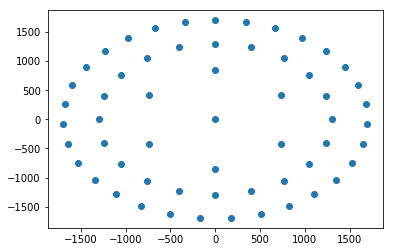

In [199]:
plt.scatter(list(x_center_locs.values()), list(y_center_locs.values()))

In [205]:
import json

In [222]:
list(x_center_locs.values())[5]

736

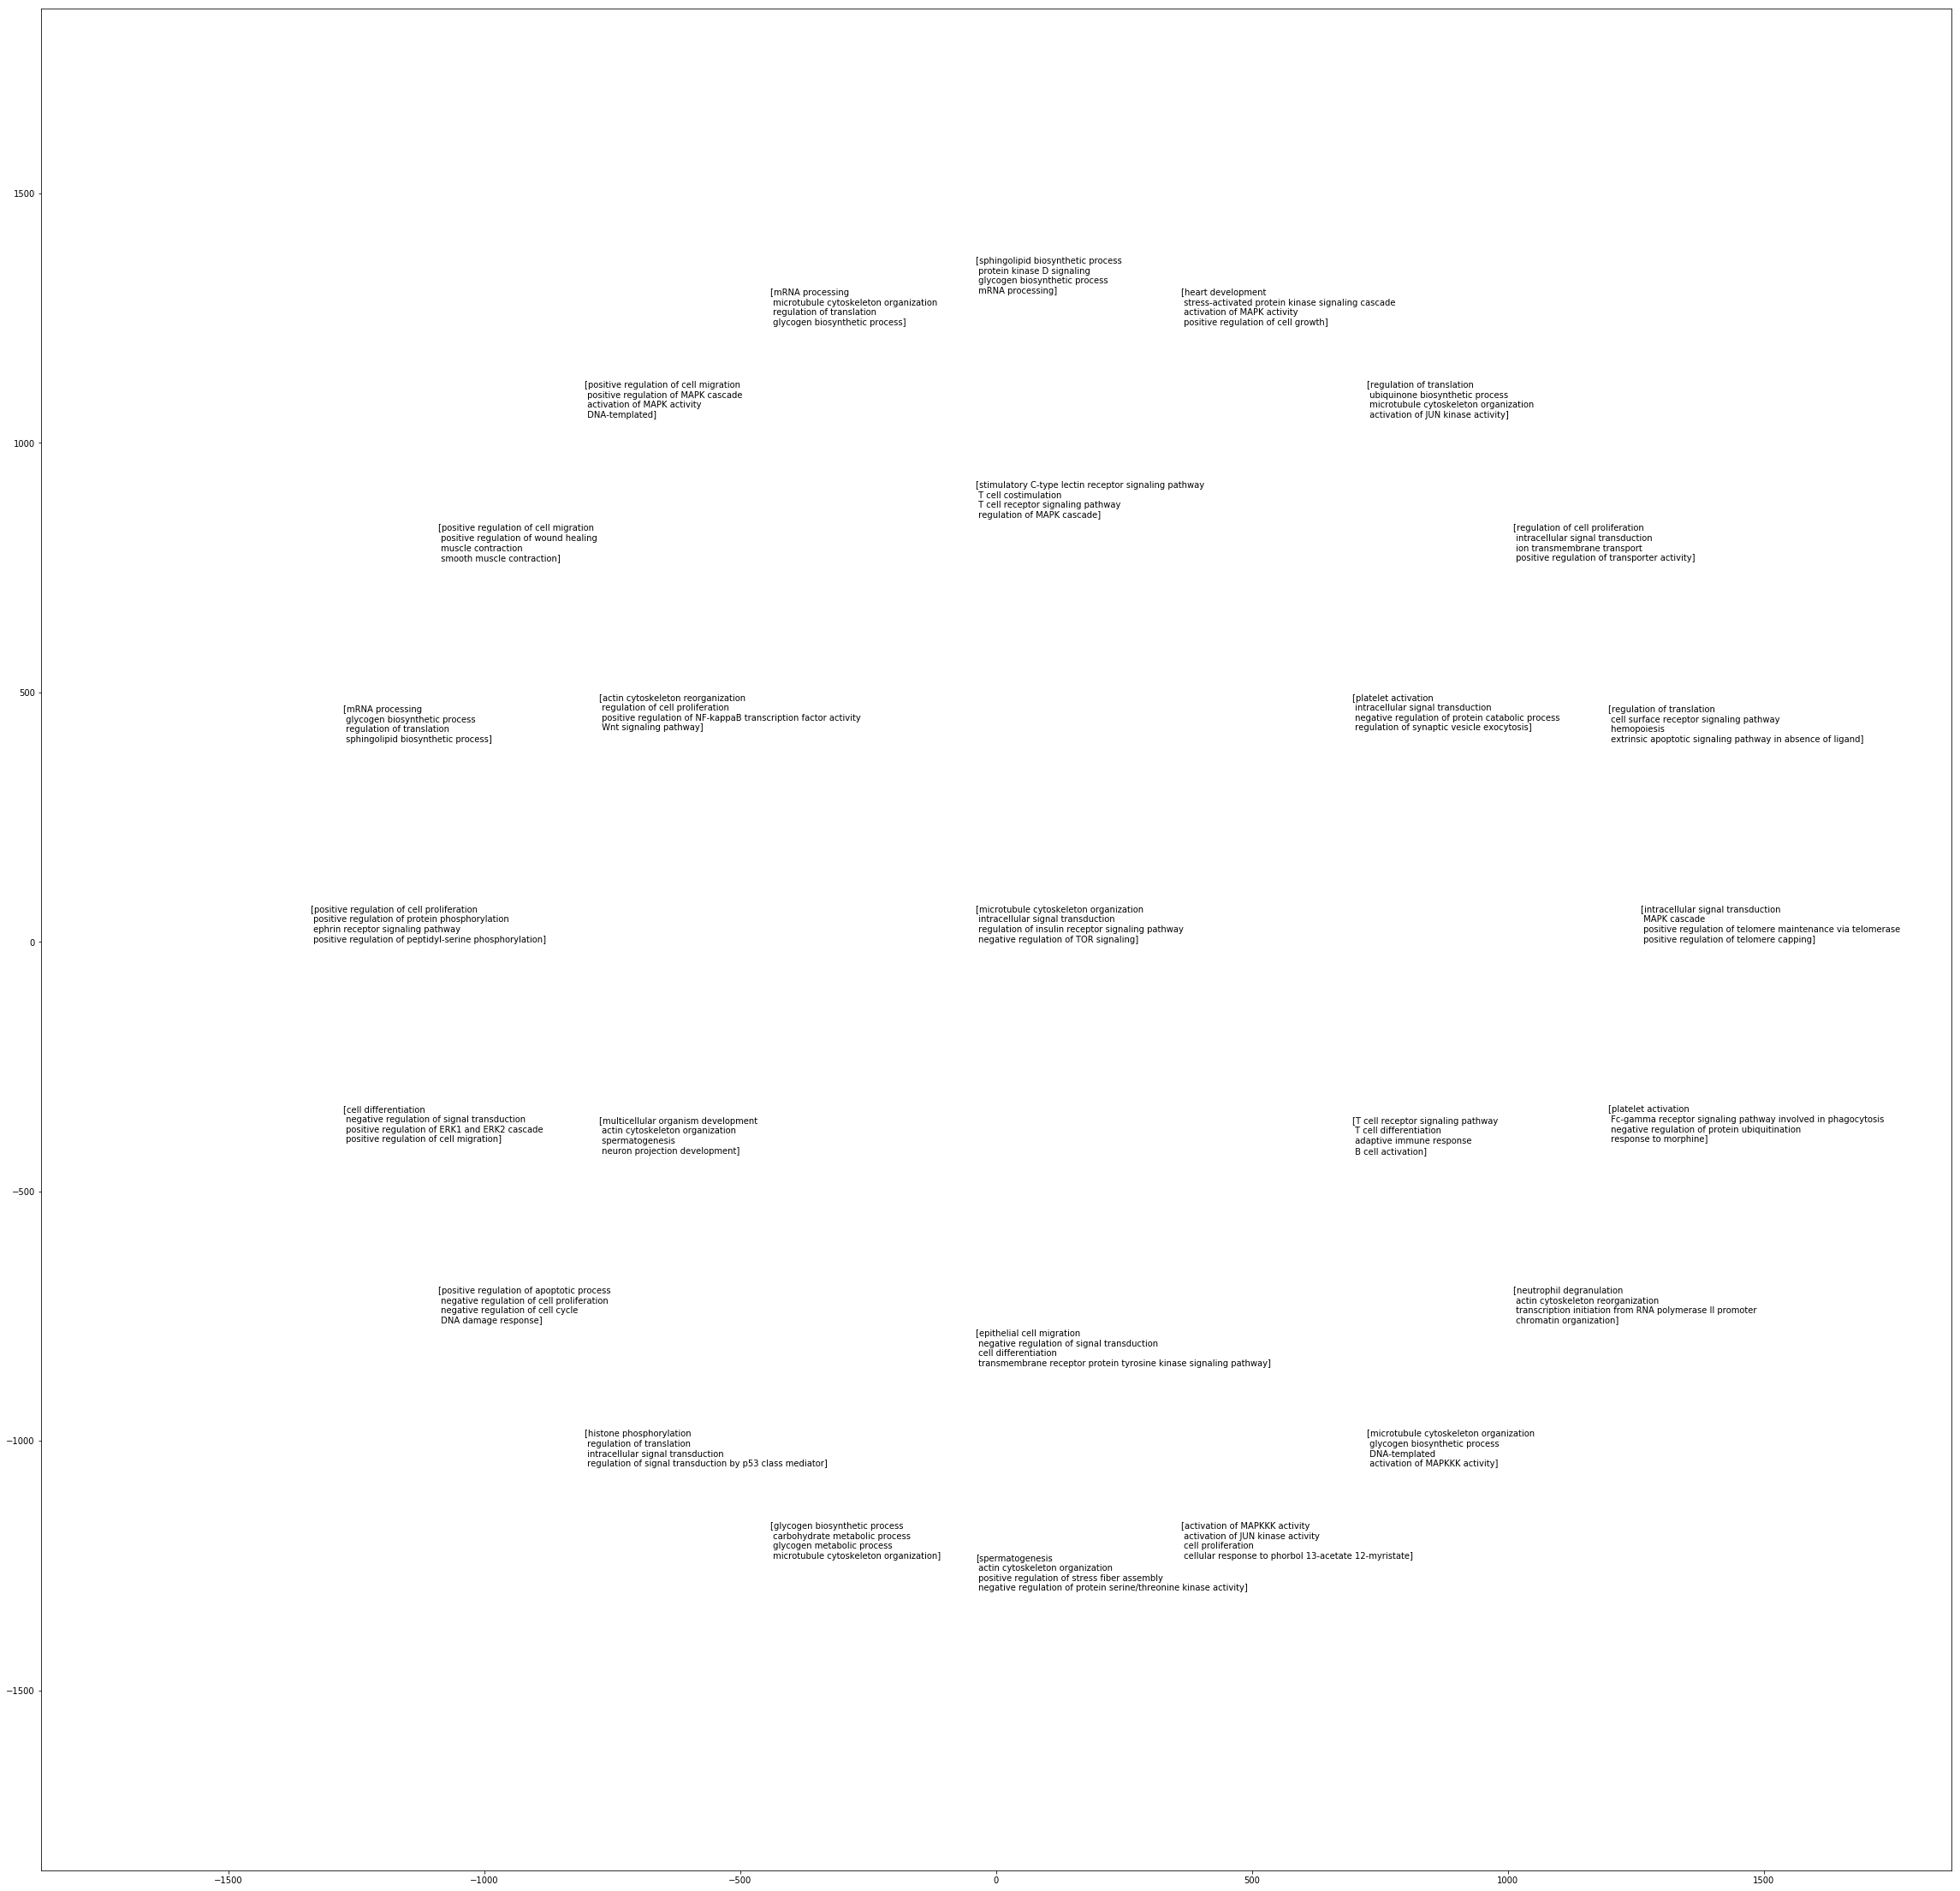

In [230]:
cluster_annots = pd.read_csv('../viz/top_positive_predictors.csv', index_col=0).to_dict(orient='index')
fig, ax = plt.subplots(figsize=(40,40))
plt.scatter(list(x_center_locs.values()), list(y_center_locs.values()), c='white')
for i in cluster_annots.keys():
    s = int(i)
    if(s < 27):
        plt.annotate(json.dumps(tuple(cluster_annots[i].values())).replace("\"", "").replace(",","\n"), (list(x_center_locs.values())[s]-40, list(y_center_locs.values())[s]))

In [182]:
x_cluster_locs = {}
y_cluster_locs = {}

cluster_expansion_factor = 65

for c in spinglass_clusters['cluster'].unique():
    clust =  spinglass_clusters[spinglass_clusters['cluster']==c]['names']
    n_clust = len(clust)
    
    sqrt_n = int(np.sqrt(n_clust))
    
    count = 0
    for item in clust:
        x_cluster_locs.update({item:(count//sqrt_n-sqrt_n//2)*cluster_expansion_factor})
        y_cluster_locs.update({item:(count%sqrt_n-sqrt_n//2)*cluster_expansion_factor})
        count += 1

In [183]:
x_cluster_locs

{'PAK1': 0,
 'PAK2': 65,
 'PAK3': 130,
 'ERBB2': -130,
 'KIT': -130,
 'PGFRB': -130,
 'PGFRA': -130,
 'HXK2': -65,
 'PTK6': -65,
 'TIE1': -65,
 'TIE2': -65,
 'EGFR': 0,
 'FGFR3': 0,
 'FGFR1': 0,
 'FGFR2': 0,
 'FGFR4': 65,
 'FER': 65,
 'KT3K': 65,
 'PKN3': 65,
 'SRMS': 130,
 'RON': -195,
 'YES': -195,
 'TYRO3': -195,
 'LYN': -195,
 'SRC': -195,
 'MATK': -195,
 'TEC': -195,
 'FGR': -130,
 'FAK1': -130,
 'VGFR2': -130,
 'FAK2': -130,
 'EPHA8': -130,
 'EPHA2': -130,
 'ABL1': -130,
 'DAPK3': -65,
 'MET': -65,
 'ITK': -65,
 'BMX': -65,
 'OBSCN': -65,
 'EPHB2': -65,
 'M4K5': -65,
 'DDR2': 0,
 'TXK': 0,
 'GUC2C': 0,
 'UFO': 0,
 'RYK': 0,
 'EPHB3': 0,
 'EPHB6': 0,
 'EPHB1': 65,
 'TRIO': 65,
 'LIMK1': 65,
 'ROCK1': 65,
 'LIMK2': 65,
 'MRCKA': 65,
 'FES': 65,
 'KALRN': 130,
 'EPHA4': 130,
 'FYN': 130,
 'HCK': 130,
 'CSK': 130,
 'AGK': 130,
 'PIM1': 130,
 'EPHA3': 195,
 'ACK1': 195,
 'NTRK2': 195,
 'ABL2': 195,
 'HIPK3': 195,
 'ROCK2': 195,
 'UHMK1': 195,
 'CDKL5': 260,
 'GUC2D': 260,
 'EPHB4': 26

In [184]:
spinglass_clusters.head()

,names,cluster
0,PAK1,1
1,ERBB2,2
2,RON,3
3,YES,3
4,TYRO3,3


In [185]:
labels

{'PAK1': 1,
 'ERBB2': 2,
 'RON': 3,
 'YES': 3,
 'TYRO3': 3,
 'LYN': 3,
 'KIT': 2,
 'KPCA': 4,
 'SRC': 3,
 'MATK': 3,
 'TEC': 3,
 'FGR': 3,
 'KSYK': 5,
 'FAK1': 3,
 'VGFR2': 3,
 'VGFR1': 6,
 'ATR': 7,
 'TYK2': 6,
 'KPCD': 6,
 'BTK': 5,
 'KPCT': 6,
 'PRKDC': 7,
 'FAK2': 3,
 'PK3CG': 6,
 'MK03': 8,
 'M4K1': 9,
 'PGFRB': 2,
 'PK3CA': 6,
 'K6PF': 10,
 'K6PL': 10,
 'PHKG1': 11,
 'PHKG2': 11,
 'PGFRA': 2,
 'E2AK2': 6,
 'M3K5': 12,
 'IKKB': 6,
 'MK01': 8,
 'MP2K1': 8,
 'ARAF': 8,
 'KS6A2': 13,
 'M3K4': 12,
 'KS6A4': 13,
 'TRIB1': 12,
 'KSR2': 8,
 'EPHA8': 3,
 'EPHA2': 3,
 'ABL1': 3,
 'ZAP70': 5,
 'KPCE': 14,
 'NTRK3': 15,
 'KS6A3': 13,
 'MK14': 12,
 'MP2K2': 8,
 'KS6A1': 13,
 'NEK2': 7,
 'DYR1B': 12,
 'MKNK2': 16,
 'MAPK5': 12,
 'MKNK1': 8,
 'KPCZ': 6,
 'MYLK': 17,
 'GSK3A': 6,
 'KPCB': 6,
 'BMPR2': 18,
 'MK06': 19,
 'GSK3B': 6,
 'PDPK1': 6,
 'RIPK4': 6,
 'HXK2': 2,
 'PK3CB': 6,
 'KPCD1': 20,
 'AKT3': 6,
 'KPCG': 4,
 'MARK4': 7,
 'IRAK1': 12,
 'MP2K5': 21,
 'DAPK3': 3,
 'KPYM': 7,
 'MET': 3,
 

In [186]:
labels = spinglass_clusters.set_index('names')['cluster'].to_dict()
sizes = {n:np.sum(total_edges==n) for n in spinglass_clusters['names'].unique()}

In [187]:
nodes = [{"id":n, "label":n, "x":int(x_center_locs[labels[n]] + x_cluster_locs[n]), "y":int(y_center_locs[labels[n]] + y_cluster_locs[n]), "size":int(np.log(sizes[n])+1), "color":t[labels[n]]} for i,n in enumerate(spinglass_clusters['names'])]
nodes

[{'id': 'PAK1',
  'label': 'PAK1',
  'x': -1051,
  'y': 764,
  'size': 5,
  'color': '#fdf6b8'},
 {'id': 'ERBB2',
  'label': 'ERBB2',
  'x': -866,
  'y': 294,
  'size': 5,
  'color': '#fdefb1'},
 {'id': 'RON',
  'label': 'RON',
  'x': -195,
  'y': 655,
  'size': 2,
  'color': '#fee6a7'},
 {'id': 'YES',
  'label': 'YES',
  'x': -195,
  'y': 720,
  'size': 4,
  'color': '#fee6a7'},
 {'id': 'TYRO3',
  'label': 'TYRO3',
  'x': -195,
  'y': 785,
  'size': 2,
  'color': '#fee6a7'},
 {'id': 'LYN',
  'label': 'LYN',
  'x': -195,
  'y': 850,
  'size': 5,
  'color': '#fee6a7'},
 {'id': 'KIT',
  'label': 'KIT',
  'x': -866,
  'y': 359,
  'size': 4,
  'color': '#fdefb1'},
 {'id': 'KPCA',
  'label': 'KPCA',
  'x': -764,
  'y': 1051,
  'size': 4,
  'color': '#fedfa0'},
 {'id': 'SRC',
  'label': 'SRC',
  'x': -195,
  'y': 915,
  'size': 5,
  'color': '#fee6a7'},
 {'id': 'MATK',
  'label': 'MATK',
  'x': -195,
  'y': 980,
  'size': 3,
  'color': '#fee6a7'},
 {'id': 'TEC',
  'label': 'TEC',
  'x': -195

In [188]:
edges = [{"id":i, "source":row[0], "target":row[1], "size":row[2]} for i, row in edges_df.iterrows()]
edges

[{'id': 0, 'source': 'PAK1', 'target': 'ERBB2', 'size': 3.0},
 {'id': 1, 'source': 'RON', 'target': 'YES', 'size': 0.5},
 {'id': 2, 'source': 'TYRO3', 'target': 'YES', 'size': 0.5},
 {'id': 3, 'source': 'LYN', 'target': 'KIT', 'size': 0.5},
 {'id': 4, 'source': 'KPCA', 'target': 'KIT', 'size': 6.0},
 {'id': 5, 'source': 'SRC', 'target': 'KIT', 'size': 2.0},
 {'id': 6, 'source': 'MATK', 'target': 'KIT', 'size': 0.5},
 {'id': 7, 'source': 'TEC', 'target': 'KIT', 'size': 0.5},
 {'id': 8, 'source': 'FGR', 'target': 'SRC', 'size': 1.0},
 {'id': 9, 'source': 'KSYK', 'target': 'FGR', 'size': 1.0},
 {'id': 10, 'source': 'FAK1', 'target': 'FGR', 'size': 1.0},
 {'id': 11, 'source': 'VGFR2', 'target': 'VGFR1', 'size': 6.0},
 {'id': 12, 'source': 'ATR', 'target': 'VGFR1', 'size': 0.5},
 {'id': 13, 'source': 'TYK2', 'target': 'LYN', 'size': 2.0},
 {'id': 14, 'source': 'LYN', 'target': 'KPCD', 'size': 2.0},
 {'id': 15, 'source': 'LYN', 'target': 'BTK', 'size': 4.0},
 {'id': 16, 'source': 'MATK', 'ta

In [189]:
graph = {"nodes":nodes, "edges":edges}
graph

{'nodes': [{'id': 'PAK1',
   'label': 'PAK1',
   'x': -1051,
   'y': 764,
   'size': 5,
   'color': '#fdf6b8'},
  {'id': 'ERBB2',
   'label': 'ERBB2',
   'x': -866,
   'y': 294,
   'size': 5,
   'color': '#fdefb1'},
  {'id': 'RON',
   'label': 'RON',
   'x': -195,
   'y': 655,
   'size': 2,
   'color': '#fee6a7'},
  {'id': 'YES',
   'label': 'YES',
   'x': -195,
   'y': 720,
   'size': 4,
   'color': '#fee6a7'},
  {'id': 'TYRO3',
   'label': 'TYRO3',
   'x': -195,
   'y': 785,
   'size': 2,
   'color': '#fee6a7'},
  {'id': 'LYN',
   'label': 'LYN',
   'x': -195,
   'y': 850,
   'size': 5,
   'color': '#fee6a7'},
  {'id': 'KIT',
   'label': 'KIT',
   'x': -866,
   'y': 359,
   'size': 4,
   'color': '#fdefb1'},
  {'id': 'KPCA',
   'label': 'KPCA',
   'x': -764,
   'y': 1051,
   'size': 4,
   'color': '#fedfa0'},
  {'id': 'SRC',
   'label': 'SRC',
   'x': -195,
   'y': 915,
   'size': 5,
   'color': '#fee6a7'},
  {'id': 'MATK',
   'label': 'MATK',
   'x': -195,
   'y': 980,
   'size': 3,

In [190]:
len({(n['x'],n['y']):n['id'] for n in nodes})

473

In [191]:
spinglass_clusters[spinglass_clusters['names']=='ROCK2']

,names,cluster
311,ROCK2,3


In [169]:
spinglass_clusters[spinglass_clusters['names']=='ROCK2']

,names,cluster
311,ROCK2,3


In [192]:
with open('../viz/dist/graph.json', 'w') as f:
    f.write(json.dumps(graph))

In [11]:
len(spinglass_clusters['cluster'].unique())

58

In [78]:
[t[labels[n]] for i,n in enumerate(spinglass_clusters['names'])]

['#x2x1xa',
 '#x4x312',
 '#x7x61c',
 '#x7x61c',
 '#x7x61c',
 '#x7x61c',
 '#x4x312',
 '#xbx924',
 '#x7x61c',
 '#x7x61c',
 '#x7x61c',
 '#x7x61c',
 '#11xc2f',
 '#x7x61c',
 '#x7x61c',
 '#15xe39',
 '#1a1042',
 '#15xe39',
 '#15xe39',
 '#11xc2f',
 '#15xe39',
 '#1a1042',
 '#x7x61c',
 '#15xe39',
 '#21114e',
 '#271258',
 '#x4x312',
 '#15xe39',
 '#2f1163',
 '#2f1163',
 '#36106b',
 '#36106b',
 '#x4x312',
 '#15xe39',
 '#3dxf71',
 '#15xe39',
 '#21114e',
 '#21114e',
 '#21114e',
 '#461077',
 '#3dxf71',
 '#461077',
 '#3dxf71',
 '#21114e',
 '#x7x61c',
 '#x7x61c',
 '#x7x61c',
 '#11xc2f',
 '#4c117a',
 '#54137d',
 '#461077',
 '#3dxf71',
 '#21114e',
 '#461077',
 '#1a1042',
 '#3dxf71',
 '#5b167f',
 '#3dxf71',
 '#21114e',
 '#15xe39',
 '#621980',
 '#15xe39',
 '#15xe39',
 '#691c81',
 '#6f1e82',
 '#15xe39',
 '#15xe39',
 '#15xe39',
 '#x4x312',
 '#15xe39',
 '#772182',
 '#15xe39',
 '#xbx924',
 '#1a1042',
 '#3dxf71',
 '#7d2482',
 '#x7x61c',
 '#1a1042',
 '#x7x61c',
 '#852682',
 '#3dxf71',
 '#1a1042',
 '#x7x61c',
 '#x

In [103]:
l = []
for r in list(filter(lambda x: x['label']==18, nodes)):
    l.append(r['color'])
    
print(set(l))

{'#691c81'}


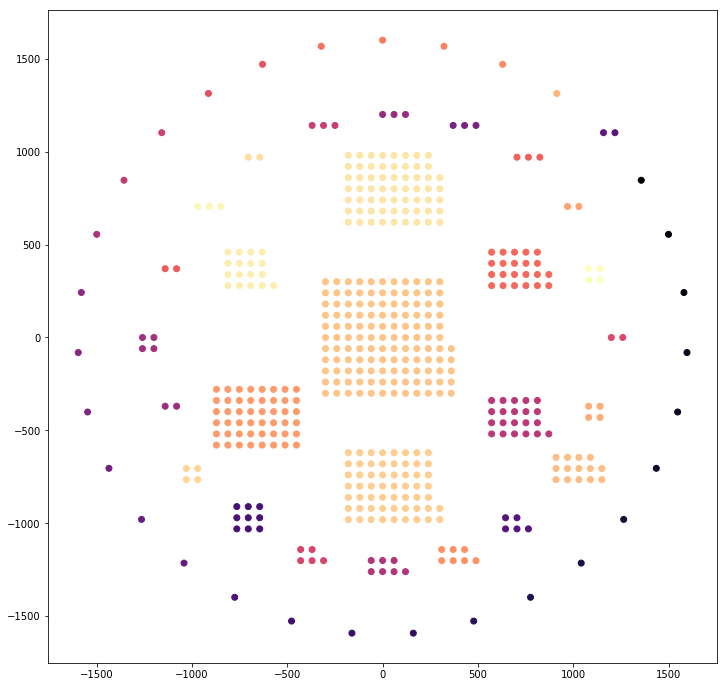

In [171]:
x_temp = [n['x']for n in nodes]
y_temp = [n['y']for n in nodes]
#co = [t[n['label']] for n in nodes]
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(x_temp, y_temp, c=[labels[n] for n in spinglass_clusters['names']], cmap='magma_r')
#plt.scatter(x_temp, y_temp)

In [172]:
colors = np.round((plt.get_cmap('magma_r')(np.linspace(0, 1.0, 59))*256)[:,:3],0)
print(colors)

[[253. 254. 192.]
 [253. 246. 184.]
 [253. 239. 177.]
 [254. 230. 167.]
 [254. 223. 160.]
 [255. 214. 152.]
 [255. 206. 145.]
 [255. 199. 139.]
 [255. 190. 131.]
 [255. 182. 125.]
 [255. 173. 118.]
 [255. 165. 113.]
 [255. 158. 108.]
 [254. 149. 103.]
 [253. 141.  99.]
 [252. 131.  96.]
 [250. 124.  94.]
 [248. 114.  92.]
 [246. 107.  92.]
 [243. 100.  93.]
 [239.  92.  95.]
 [235.  86.  97.]
 [229.  79. 101.]
 [224.  75. 104.]
 [218.  71. 107.]
 [211.  66. 111.]
 [204.  63. 114.]
 [196.  60. 117.]
 [190.  57. 120.]
 [182.  54. 122.]
 [175.  52. 124.]
 [169.  50. 126.]
 [160.  48. 127.]
 [154.  46. 128.]
 [146.  43. 129.]
 [139.  41. 130.]
 [133.  38. 130.]
 [125.  36. 130.]
 [119.  33. 130.]
 [111.  30. 130.]
 [105.  28. 129.]
 [ 98.  25. 128.]
 [ 91.  22. 127.]
 [ 84.  19. 125.]
 [ 76.  17. 122.]
 [ 70.  16. 119.]
 [ 61.  15. 113.]
 [ 54.  16. 107.]
 [ 47.  17.  99.]
 [ 39.  18.  88.]
 [ 33.  17.  78.]
 [ 26.  16.  66.]
 [ 21.  14.  57.]
 [ 17.  12.  47.]
 [ 11.   9.  36.]
 [  7.   6

In [173]:
x = list(map(int,colors[:,0].tolist()))
y = list(map(int,colors[:,1].tolist()))
z = list(map(int,colors[:,2].tolist()))

In [174]:
asd = list(zip(x,y,z))

t = ['#%02x%02x%02x' % p for p in asd]

In [175]:
t

['#fdfec0',
 '#fdf6b8',
 '#fdefb1',
 '#fee6a7',
 '#fedfa0',
 '#ffd698',
 '#ffce91',
 '#ffc78b',
 '#ffbe83',
 '#ffb67d',
 '#ffad76',
 '#ffa571',
 '#ff9e6c',
 '#fe9567',
 '#fd8d63',
 '#fc8360',
 '#fa7c5e',
 '#f8725c',
 '#f66b5c',
 '#f3645d',
 '#ef5c5f',
 '#eb5661',
 '#e54f65',
 '#e04b68',
 '#da476b',
 '#d3426f',
 '#cc3f72',
 '#c43c75',
 '#be3978',
 '#b6367a',
 '#af347c',
 '#a9327e',
 '#a0307f',
 '#9a2e80',
 '#922b81',
 '#8b2982',
 '#852682',
 '#7d2482',
 '#772182',
 '#6f1e82',
 '#691c81',
 '#621980',
 '#5b167f',
 '#54137d',
 '#4c117a',
 '#461077',
 '#3d0f71',
 '#36106b',
 '#2f1163',
 '#271258',
 '#21114e',
 '#1a1042',
 '#150e39',
 '#110c2f',
 '#0b0924',
 '#07061c',
 '#040312',
 '#02010a',
 '#000004']

In [194]:
dark = pd.read_csv('../data/dark_kinases.csv', sep=',')
dark.head(5)

,hgnc_id,symbol,ensembl_gene_id,class,name,uniprot_ids,kinase_com_name
0,HGNC:19038,ADCK1,ENSG00000063761,Dark,aarF domain containing kinase 1,Q86TW2,ADCK1
1,HGNC:19039,ADCK2,ENSG00000133597,Dark,aarF domain containing kinase 2,Q7Z695,ADCK2
2,HGNC:21738,ADCK5,ENSG00000173137,Dark,aarF domain containing kinase 5,Q3MIX3,ADCK5
3,HGNC:20565,ALPK2,ENSG00000198796,Dark,alpha kinase 2,Q86TB3,AlphaK2
4,HGNC:17574,ALPK3,ENSG00000136383,Dark,alpha kinase 3,Q96L96,AlphaK1


In [195]:
[x for x in dark['symbol'] if x in spinglass_clusters['names']]

[]